# Visualizando os Dados

Desta vez, vamos fazer alguns gráficos para nos ajudar a entender um pouco melhor os dados que temos em mãos. Vamos começar com alguns imports:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

from jurisprudencia import load_dataset #Como vamos usar o dataset em vários (assim espero!) notebooks, achei melhor empacotar como um módulo.

Hora de carregar nossos dados a partir do CSV gerado no [notebook anterior](https://github.com/ranophoenix/notebooks-jurisprudencia/blob/master/notebooks/01-Convertendo-XML-Para-CSV.ipynb):

In [2]:
df = load_dataset()
df.head()

,txtAcordao,data,txtVoto,NroProcesso,NroAcordao,DescRecurso,DesRelator,OrgaoJulgador,txtEmenta,txtRelatorio
0,"Vistos, relatados e discutidos estes autos, a...",2015-07-30 00:00:00+00:00,DESEMBARGADORA ELVIRA MARIA DE ALMEIDA SILVA ...,201500712507,201512285,embargos de declaração,desa. elvira maria de almeida silva,1ª câmara cível,EMBARGOS DECLARATÓRIOS ? INEXISTÊNCIA DE OMIS...,DESEMBARGADORA ELVIRA MARIA DE ALMEIDA SILVA ...
1,"Vistos, relatados e discutidos os presentes a...",2015-12-02 00:00:00+00:00,O recurso preencheu os requisitos de validade...,201500712508,201521198,agravo de instrumento,des. osório de araújo ramos filho,1ª câmara cível,PROCESSO CIVIL. AGRAVO DE INSTRUMENTO. EXECUÇ...,A EMPRESA MUNICIPAL DE OBRAS E URBANIZAÇÃO ? ...
2,"Vistos, relatados e discutidos estes autos, a...",2015-06-25 00:00:00+00:00,Desa. Elvira Maria de Almeida Silva (Relatora...,201500712512,20159547,apelação,desa. elvira maria de almeida silva,1ª câmara cível,APELAÇÃO CÍVEL. AÇÃO DE USUCAPIÃO.EXTINÇÃO DO...,R E L A T Ó R I O Desembargadora Elvira Maria...
3,"Vistos, relatados e discutidos os presentes a...",2015-11-03 00:00:00+00:00,"Preenchidos os requisitos de admissibilidade,...",201500712515,201518637,apelação,des. roberto eugenio da fonseca porto,1ª câmara cível,APELAÇÃO CÍVEL - AÇÃO DE INDENIZAÇÃO POR DANO...,Cuida-se de Apelações Cíveis interposta pela ...
4,"Vistos, relatados e discutidos os presentes a...",2015-06-19 00:00:00+00:00,Des. ROBERTO EUGENIO DA FONSECA PORTO (Relato...,201500712518,20159286,apelação,des. roberto eugenio da fonseca porto,1ª câmara cível,APELAÇÃO CÍVEL ? JULGAMENTO DE IMPUGNAÇÃO COM...,Des. ROBERTO EUGENIO DA FONSECA PORTO (Relato...


Beleza! "Uma imagem vale mais que mil palavras", então, vamos criar nosso primeiro gráfico com o intuito de visualizar a distribuição dos acórdaos com o passar dos anos:

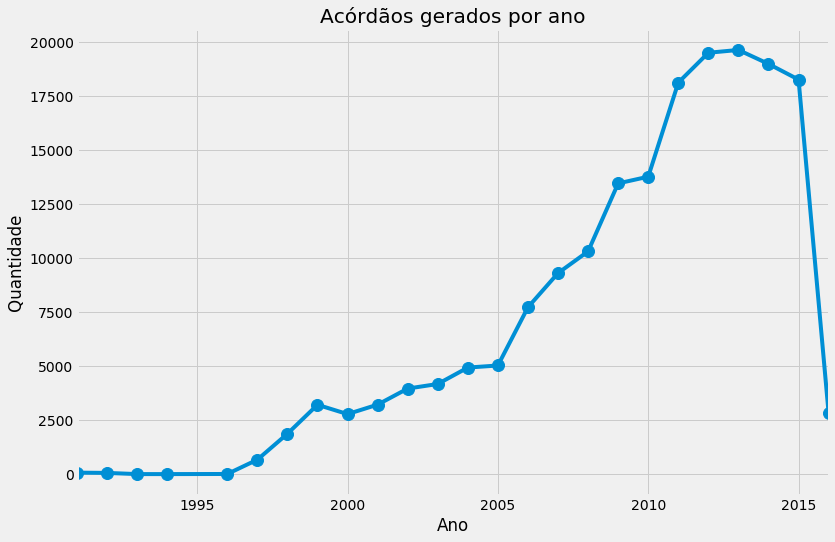

In [3]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['animation.html'] = 'html5'

ax = df.groupby(df['data'].dt.year)['data'].count().plot(marker='o', markersize=12)
ax.set_title('Acórdãos gerados por ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade');

Pelo gráfico, a quantidade de acórdãos vem aumentando consideravelmente com o passar dos anos. No entanto, em 2016, teve um queda brusca no número de acórdãos. Considerando que obtive esses dados em setembro de 2016, antes do término do ano, muitos processos não foram contabilizados. Que tal visualizarmos essa distribuição por Órgão Julgador?

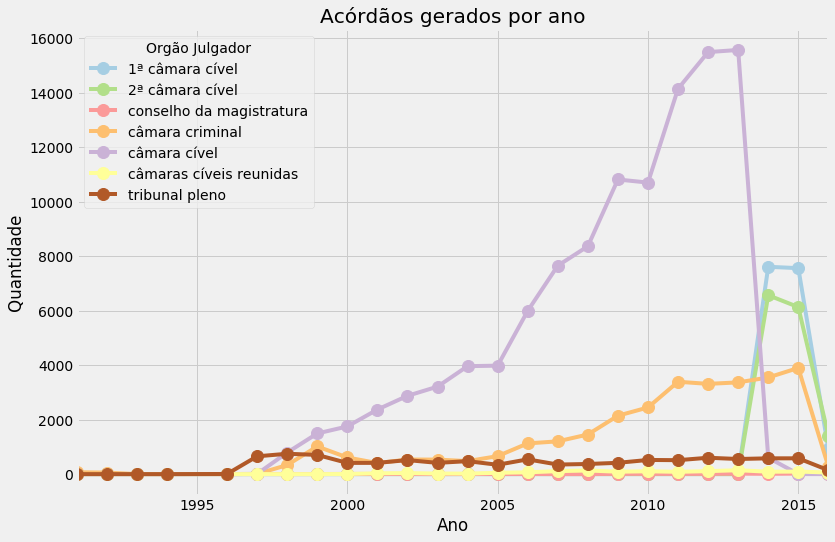

In [4]:
ax = df.groupby([df['data'].dt.year, 'OrgaoJulgador'])['data'].count().unstack().fillna(0).plot(cmap="Paired", marker='o', markersize=12)
ax.set_title('Acórdãos gerados por ano')
ax.set_xlabel('Ano')
ax.legend(title='Orgão Julgador')
ax.set_ylabel('Quantidade');

Podemos ver que a câmara cível é o órgão julgador que mais gerou acórdãos com o passar dos anos. Não tenho certeza, mas, analisando o gráfico, parece que ela foi dividida em primeira e segunda câmara cívil, justificando, com isso, a queda brusca que percebemos no gráfico anterior.

São mais de 100 tipos de recurso que temos em nossa base, assim, vamos escolher visualizar somente os 20 mais comuns:

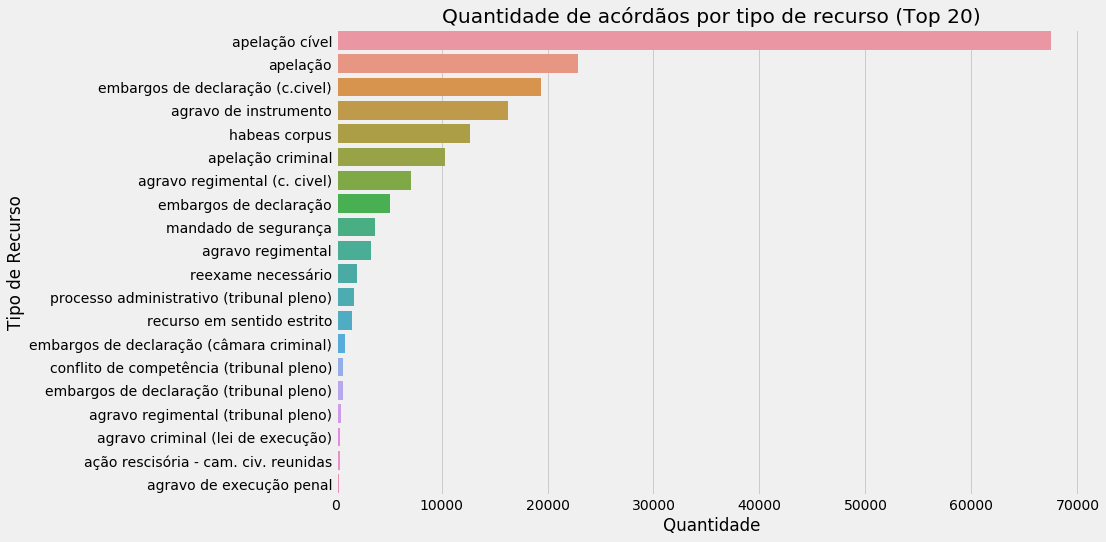

In [5]:
ax = sns.countplot(y=df['DescRecurso'], order=df['DescRecurso'].value_counts().iloc[:20].index)
ax.set_title('Quantidade de acórdãos por tipo de recurso (Top 20)')
ax.set_ylabel('Tipo de Recurso')
ax.set_xlabel('Quantidade');

É...quem nunca ouviu a expressão: "Vou apelar à Justiça!". Faz muito sentido, né? As apelações são o tipo de recurso mais comum nos acórdãos. O *habeas corpus* também é outro recurso que ficou bem conhecido do publico geral e ocupa a 5ª posição do nosso ranking.

E quanto aos relatores? Vamos dar uma olhada também no top 20 dos que mais atuaram nos acórdãos:

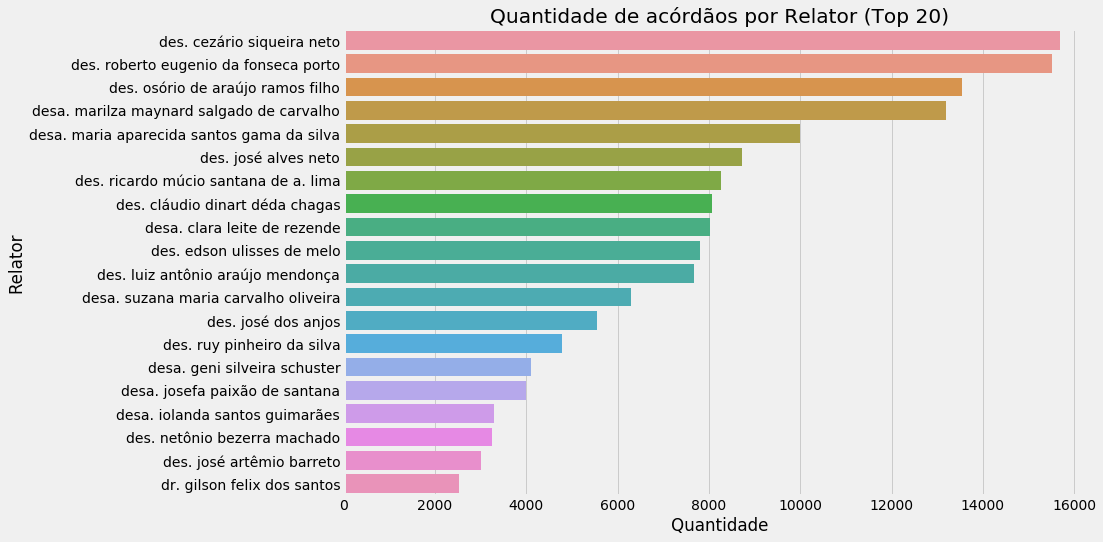

In [6]:
ax = sns.countplot(y=df['DesRelator'], order=df['DesRelator'].value_counts().iloc[:20].index)
ax.set_title('Quantidade de acórdãos por Relator (Top 20)')
ax.set_ylabel('Relator')
ax.set_xlabel('Quantidade');

Não sei vocês, mas estou com vontade de olhar mais de perto um dos campos textuais. Vimos no notebook anterior que o campo `txtEmenta` sintetiza todo o acórdão. Que tal trabalharmos um pouco com ele?

Vamos brincar um pouco com Processamento de Linguagem Natual (NLP, em inglês). Pra quem não conhece (e pra quem conhece também!) recomendo a leitura [desse artigo](https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e).

Usaremos aqui o pacote [NLTK](https://www.nltk.org/). Ele possui recursos extremamente úteis para quem trabalha com processamento textual. Rasparemos a sua superfície utilizando-o somente para remover as [stopwords](https://en.wikipedia.org/wiki/Stop_words) do nosso idioma. No código abaixo, executamos 3 passos bem comuns, mas de forma alguma obrigatórios, em atividades NLP:

1. Converter para caixa-baixa;
2. Remover caracteres de pontuação e símbolos;
3. Remover stopwords.

Essas etapas ajudam bastante para reduzir a dimensionalidade dos dados. Tem n outras etapas que podem ser executadas a depender do tipo de problema que estejamos resolvendo(*stemming*, *lemmatization*, etc).

Demora um pouco, acho que dá tempo de levantar e beber um copo d'água. :)

In [7]:
from string import punctuation
import nltk
import re

nltk.download('stopwords')
nltk.download('punkt')


def limpar_texto(texto):
    texto_processado = texto.lower()
    #Remove qualquer caractere que não seja alfanumérico, espaço ou hífen (pra não perdermos palavras compostas, ex. falar-lhe)
    texto_processado = re.sub(r'[^\w\s-]','',texto_processado)
    texto_processado = nltk.tokenize.word_tokenize(texto_processado, language='portuguese')
    
    stopwords = nltk.corpus.stopwords.words('portuguese') 
    texto_processado = [palavra for palavra in texto_processado if palavra not in stopwords]
    
    return ' '.join(texto_processado)

display(df['txtEmenta'].head())

df['txtEmenta_processada'] = df['txtEmenta'].apply(limpar_texto)
    
df['txtEmenta_processada'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/robertanderson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/robertanderson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0     EMBARGOS DECLARATÓRIOS ? INEXISTÊNCIA DE OMIS...
1     PROCESSO CIVIL. AGRAVO DE INSTRUMENTO. EXECUÇ...
2     APELAÇÃO CÍVEL. AÇÃO DE USUCAPIÃO.EXTINÇÃO DO...
3     APELAÇÃO CÍVEL - AÇÃO DE INDENIZAÇÃO POR DANO...
4     APELAÇÃO CÍVEL ? JULGAMENTO DE IMPUGNAÇÃO COM...
Name: txtEmenta, dtype: object

0    embargos declaratórios inexistência omissão ju...
1    processo civil agravo instrumento execução tít...
2    apelação cível ação usucapiãoextinção processo...
3    apelação cível - ação indenização dano materia...
4    apelação cível julgamento impugnação extinção ...
Name: txtEmenta_processada, dtype: object

Massa! Vamos gerar uma nuvem com as palavras mais utilizadas nos acórdãos?

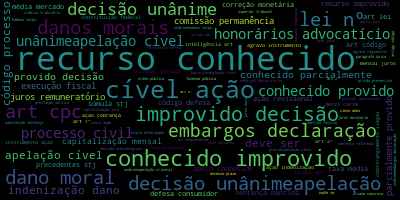

In [8]:
import wordcloud


palavras = ''.join(df['txtEmenta_processada'])
wordcloud = wordcloud.WordCloud()

wordcloud.generate(palavras)
wordcloud.to_image()

Bem legal! Vendo isso me veio uma ideia...Que tal fazer uma animação com uma nuvem de palavras para cada ano?

O código abaixo gera um vídeo em HTML5 que roda direto no navegador.

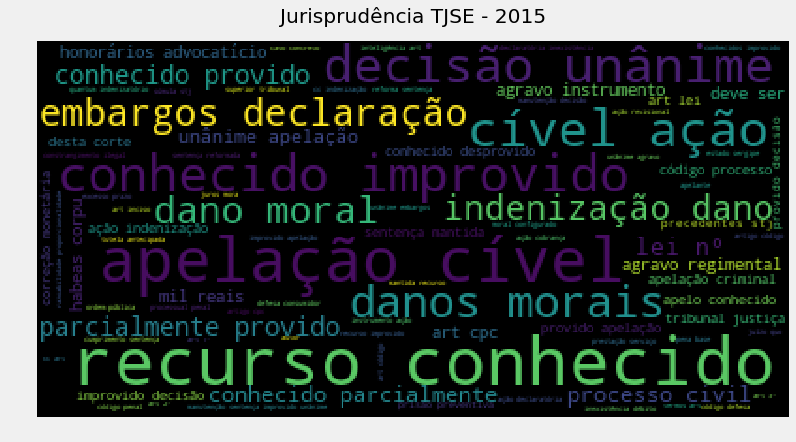

In [9]:
from matplotlib import animation
from IPython.display import HTML, Image

imagens  = []
fig, ax = plt.subplots()
plt.axis('off')

for ano in range(2010,2016):
    palavras_por_ano = ' '.join(df[df['data'].dt.year == ano]['txtEmenta_processada'])
    wordcloud.generate(palavras_por_ano)
    imagem = plt.imshow(wordcloud.to_array(), animated=True)
    titulo = ax.text(0.5,1.05,f"Jurisprudência TJSE - {ano}", size=plt.rcParams["axes.titlesize"], ha="center", transform=ax.transAxes)
    imagens.append([titulo, imagem])    
    
animacao = animation.ArtistAnimation(fig, imagens, interval=3000, blit=True,
                                repeat_delay=1000)
animacao

Massa, né? Mas quero gerar um GIF para enviar pra o pessoal via Telegram ou Whatsapp! :D

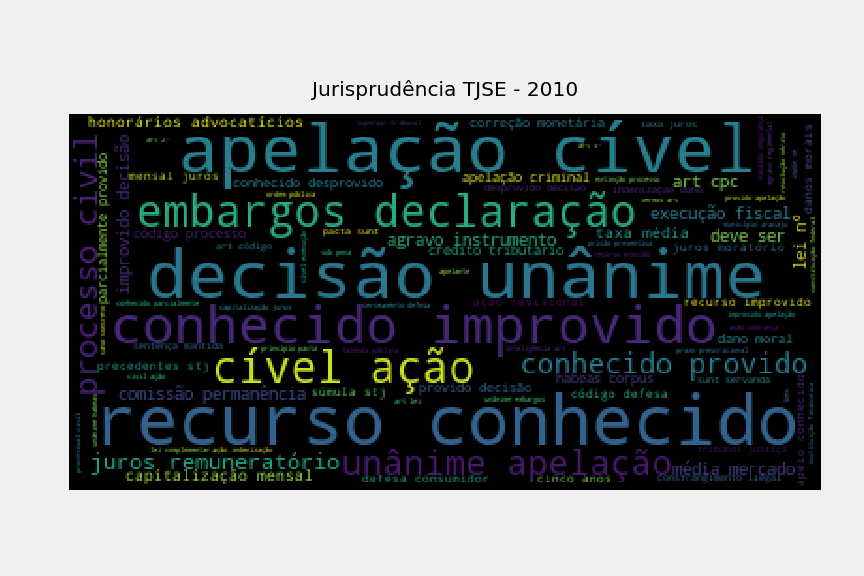

In [10]:
animacao.save('img/wc_ementa_2010_2015.gif', writer='imagemagick', fps=0.5)
Image('img/wc_ementa_2010_2015.gif')

Agora chegou o momento de brincarmos um pouco com o [SkLearn](https://scikit-learn.org/stable/).

Basicamente, geraremos um vetor contendo o número de vezes que cada palavra aparece no corpus. Pra deixar um pouco mais rápido, consideraremos somente o ano de 2015 e exibiremos somente as 10 mais utilizadas.

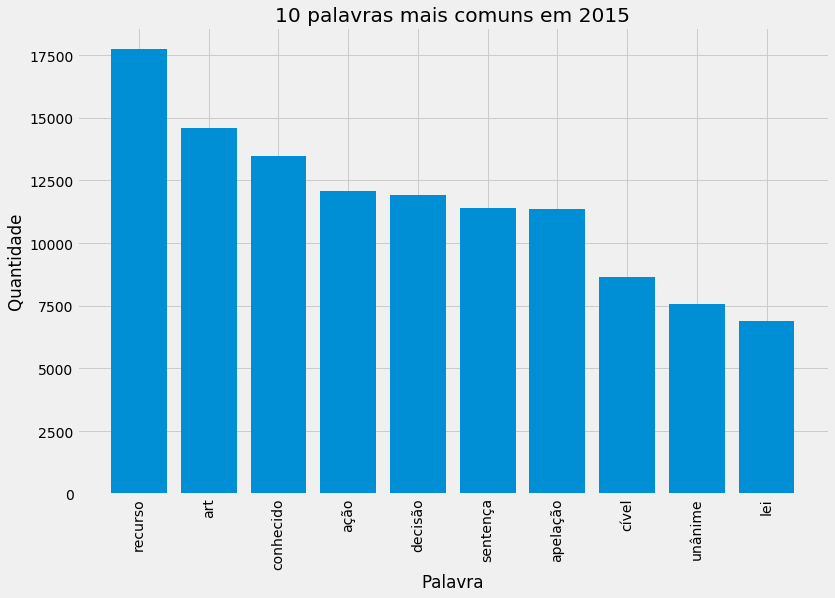

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_10_palavras_mais_usadas(dados, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in dados:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('Palavra')
    plt.ylabel('Quantidade')
    plt.title('10 palavras mais comuns em 2015')
    plt.show()

count_vectorizer = CountVectorizer()

dados = count_vectorizer.fit_transform(df[df['data'].dt.year == 2015]['txtEmenta_processada'])

plot_10_palavras_mais_usadas(dados, count_vectorizer)

Vamos aproveitar o vetor criado e utilizá-lo em nosso primero algoritmo de *machine learning*: [Latent Dirichlet Allocation (LDA)](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation). A grosso modo, o algoritmo extrai tópicos que estão presentes em nossos documentos.

Agora dá tempo de fazer até um alongamento!

In [12]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
def print_topicos(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTópico #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
n_topicos = 3
n_palavras = 10

lda = LDA(n_components=n_topicos)
lda.fit(dados)

print("Tópicos encontrados usando LDA:")
print_topicos(lda, count_vectorizer, n_palavras)

Tópicos encontrados usando LDA:

Tópico #0:
recurso ação sentença conhecido art lei apelação cível decisão nº

Tópico #1:
recurso embargos conhecido ação apelação valor danos cível sentença decisão

Tópico #2:
art pena penal decisão unânime agravo recurso ii ordem crime


É isso  aí, pessoal! Tem muita coisa legal que dá pra fazer. Algumas questões: Será que é possível classificar os documentos em relação ao tipo de recurso olhando somente a ementa? E gerar a ementa a partir do relatório e voto? E descobrir o relator olhando os textos? Enfim, como diria [Luna](https://pt.wikipedia.org/wiki/O_Show_da_Luna)..."São tantas perguntas!"

Abração e até a próxima!

